Dataset Link: https://drive.google.com/file/d/1VybAPBeyb3ZZRdIKHeaiSi14W6RJj-02/view

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv('/content/2410_iPAGE_SoilData_cleaned.csv')

In [ ]:
data.head(3)

,Area,Data Collection Year,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,2005,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,2005,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,2005,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95


In [ ]:
data.shape

(618, 13)

In [ ]:
data.describe()

,Data Collection Year,pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,2004.050162,5.236942,1.792214,0.111832,0.241246,31.144256,15.340676,0.348997,1.039191
std,7.103021,0.469949,1.034159,0.507259,0.581693,38.078580,11.062096,0.258153,0.976144
min,1990.000000,4.100000,0.100000,0.000000,0.000000,0.000000,0.400000,0.000000,0.080000
25%,1997.000000,4.900000,1.352500,0.070000,0.110000,8.785000,8.702500,0.230000,0.520000
50%,2005.000000,5.200000,1.700000,0.090000,0.170000,16.000000,12.600000,0.300000,0.820000
75%,2005.000000,5.400000,2.160000,0.110000,0.287500,37.700000,19.000000,0.400000,1.100000
max,2016.000000,7.800000,20.400000,12.600000,14.200000,254.700000,85.000000,2.660000,10.580000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   Data Collection Year   618 non-null    int64  
 2   soil group             618 non-null    object 
 3   Land class             618 non-null    object 
 4   knit (surface)         461 non-null    object 
 5   pH                     618 non-null    float64
 6   SOC (%)                618 non-null    float64
 7   Nitrogen N (%)         618 non-null    float64
 8   Potassium K (meq/100)  618 non-null    float64
 9   Phosphorus P (ug/g)    618 non-null    float64
 10  Sulfur S (ug/g)        618 non-null    float64
 11  Boron B (ug/g)         618 non-null    float64
 12  Zinc Zn (ug/g)         618 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 62.9+ KB


In [ ]:
data2 = data.dropna(axis=0)

In [ ]:
data2.head(3)

,Area,Data Collection Year,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,2005,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,2005,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,2005,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95


In [ ]:
data2.shape

(461, 13)

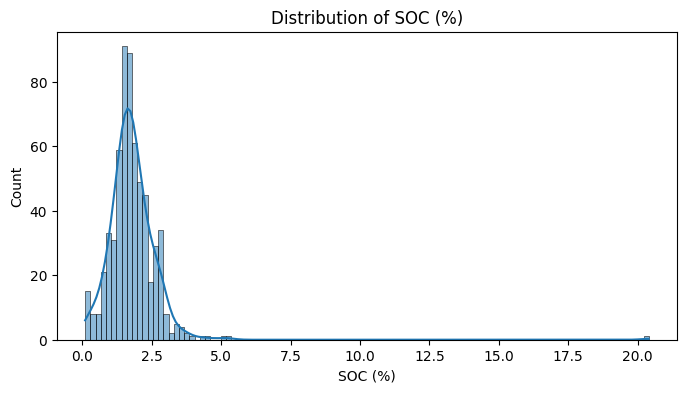

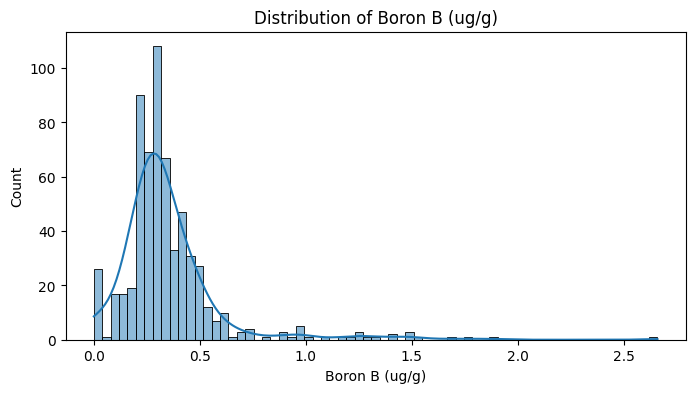

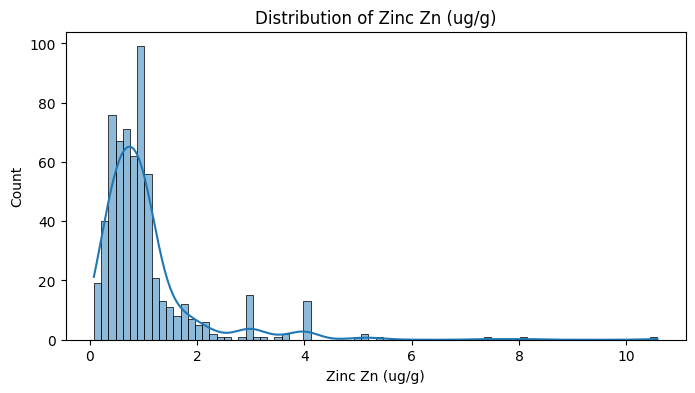

In [ ]:
target = ['SOC (%)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']

for i in target:
  plt.figure(figsize=(8,4))
  sns.histplot(data[i].dropna(), kde=True)
  plt.title(f'Distribution of {i}')
  plt.show()

In [ ]:
# analysing area wise
for col in target:
  plt.figure(figsize=(12,6))


In [ ]:
grouped_data = data.groupby('Area')

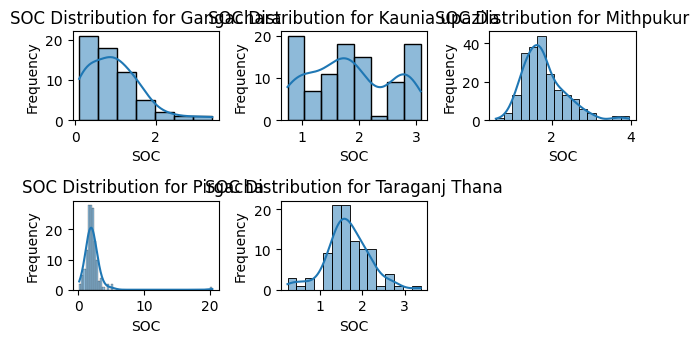

In [ ]:
# Loop through each area and create a histogram for SOC
for i, (area, group) in enumerate(grouped_data):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout (3, 3) based on number of areas
    sns.histplot(group['SOC (%)'], kde=True)  # Histogram with KDE (Kernel Density Estimate)
    plt.title(f'SOC Distribution for {area}')
    plt.xlabel('SOC')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Statistical test (ANOVA) to check if area has a significant effect on the targets
area_col = data['Area']
for col in target:
    anova_result = stats.f_oneway(*[group[col].dropna() for name, group in data.groupby(area_col)])
    print(f'ANOVA result for {col} by {area_col}:', anova_result)

ANOVA result for SOC (%) by 0           Mithpukur
1           Mithpukur
2           Mithpukur
3           Mithpukur
4           Mithpukur
            ...      
613    Taraganj Thana
614    Taraganj Thana
615    Taraganj Thana
616    Taraganj Thana
617    Taraganj Thana
Name: Area, Length: 618, dtype: object: F_onewayResult(statistic=16.24493260498929, pvalue=1.1782663438323973e-12)
ANOVA result for Boron B (ug/g) by 0           Mithpukur
1           Mithpukur
2           Mithpukur
3           Mithpukur
4           Mithpukur
            ...      
613    Taraganj Thana
614    Taraganj Thana
615    Taraganj Thana
616    Taraganj Thana
617    Taraganj Thana
Name: Area, Length: 618, dtype: object: F_onewayResult(statistic=17.39358088916771, pvalue=1.5779365302919295e-13)
ANOVA result for Zinc Zn (ug/g) by 0           Mithpukur
1           Mithpukur
2           Mithpukur
3           Mithpukur
4           Mithpukur
            ...      
613    Taraganj Thana
614    Taraganj Thana
615    Tarag

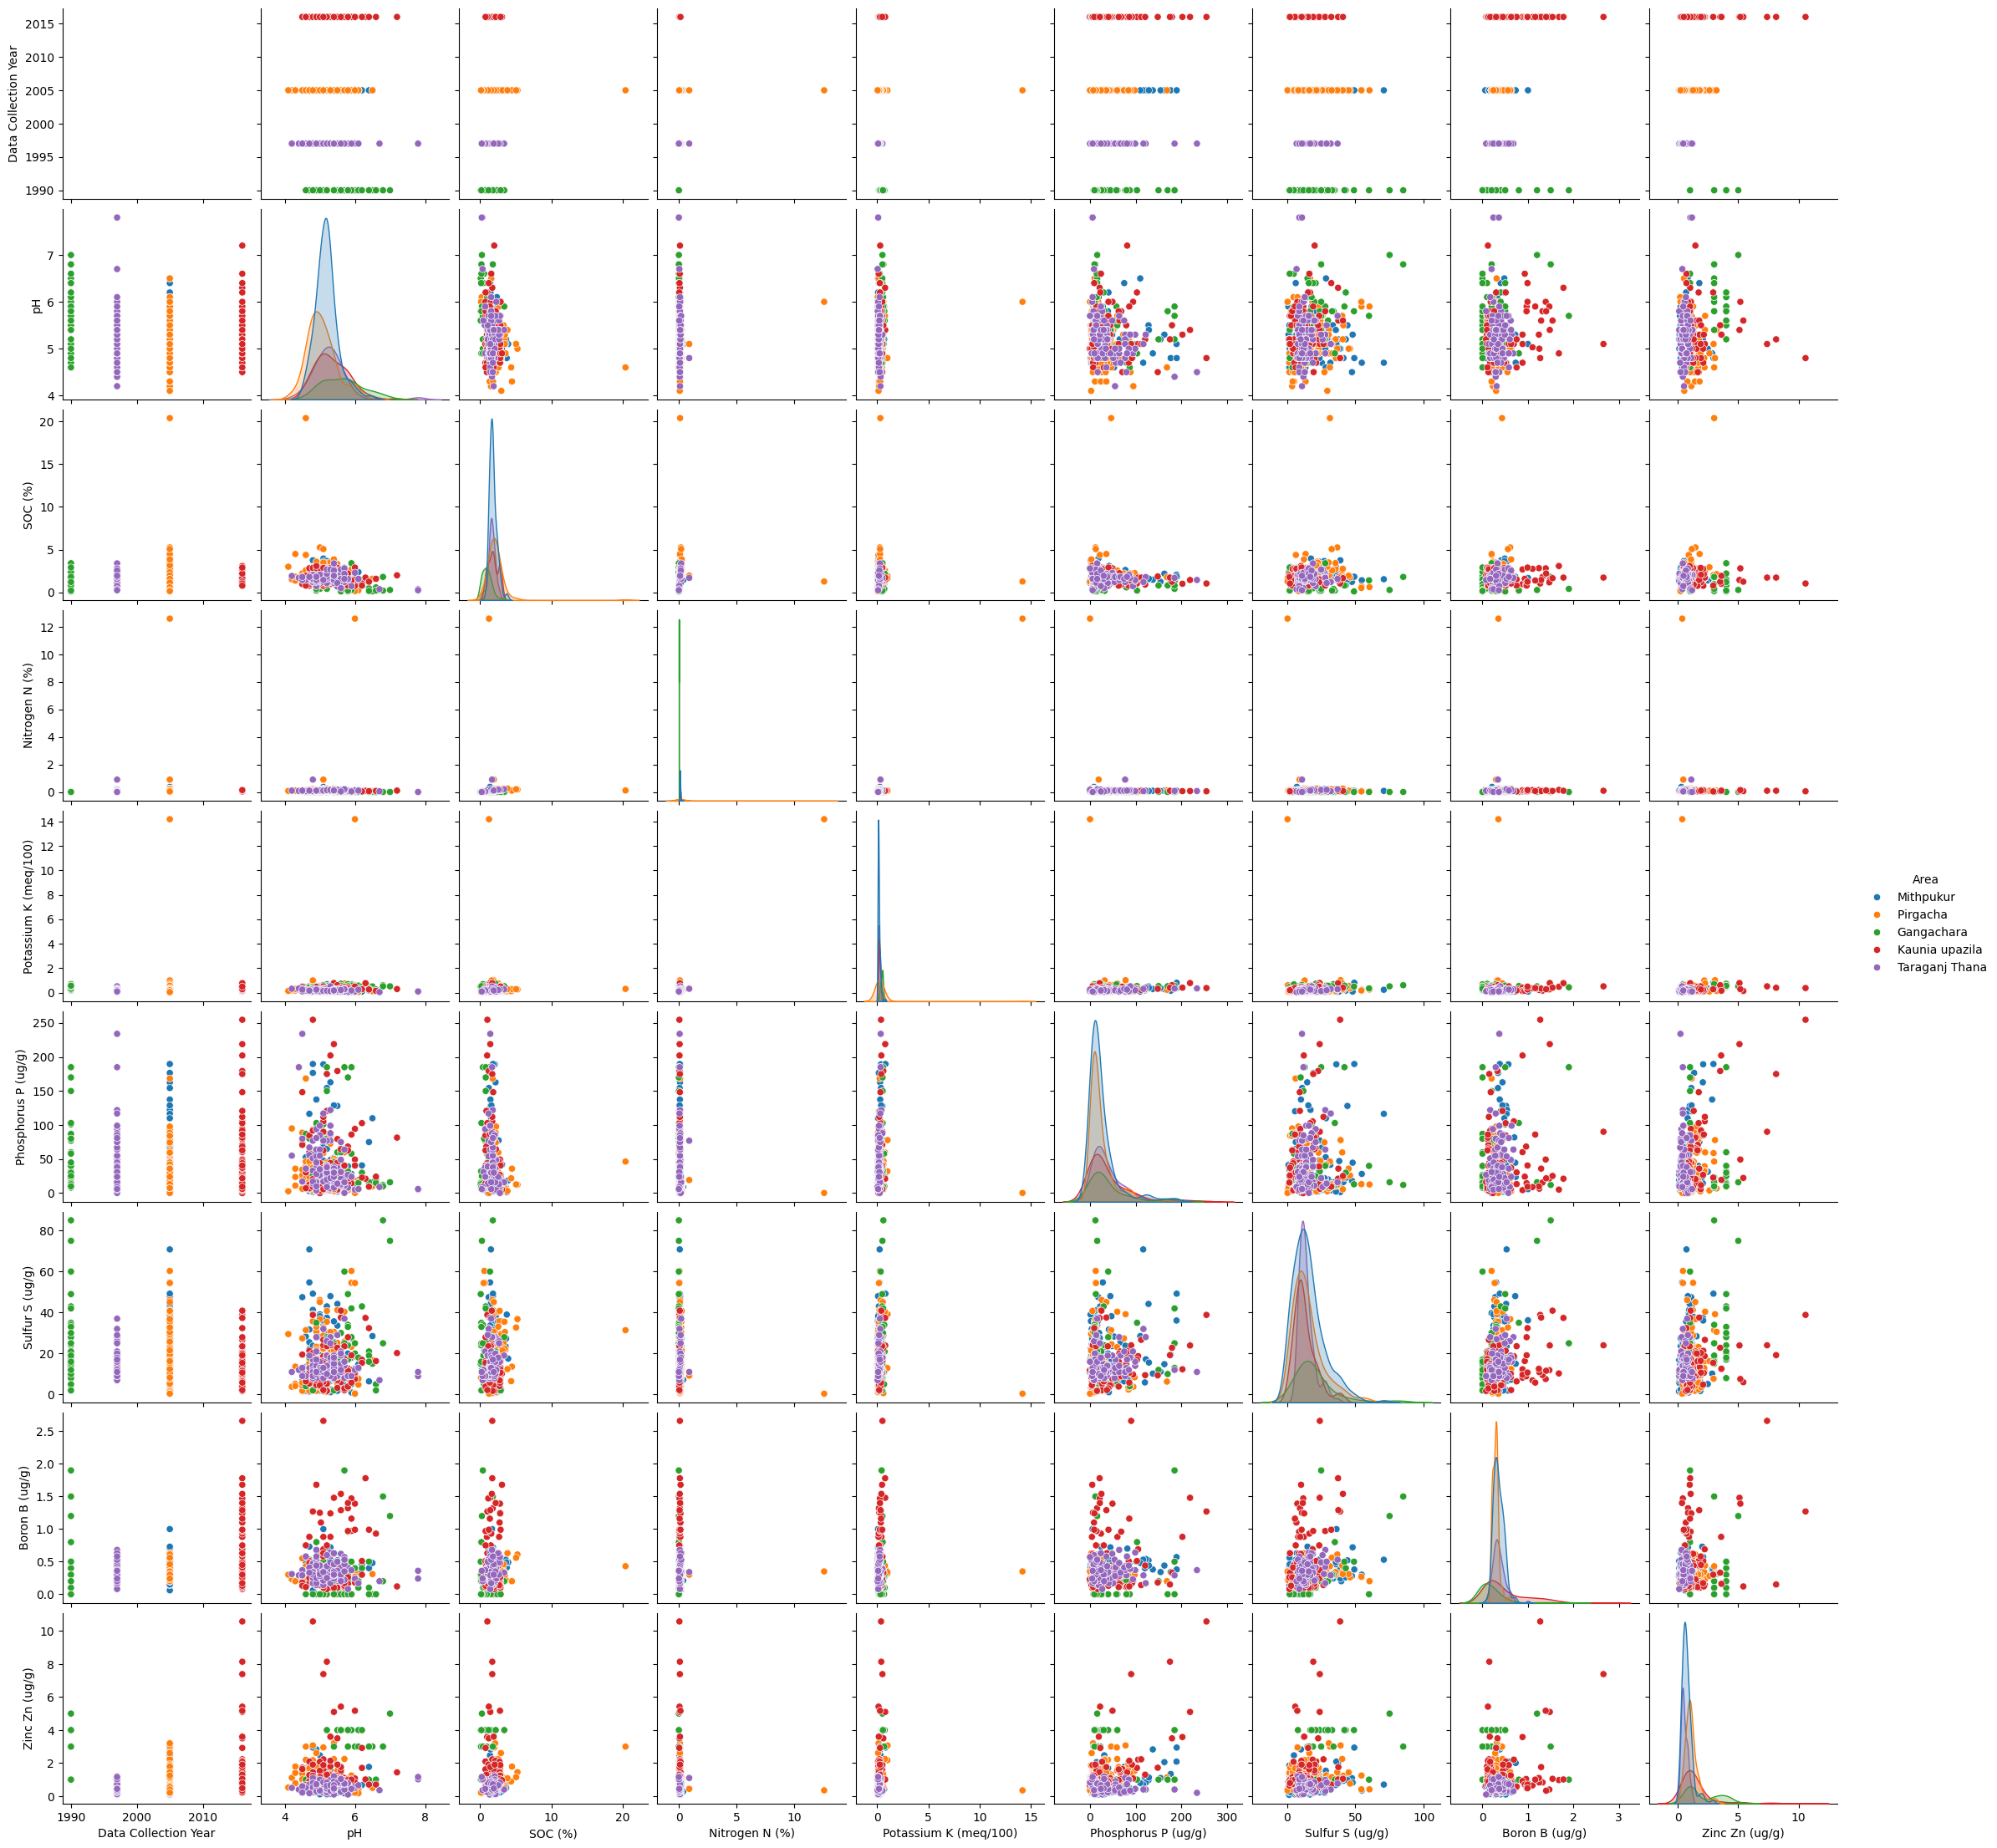

In [ ]:
sns.pairplot(data, diag_kind='kde', hue='Area')
plt.show()

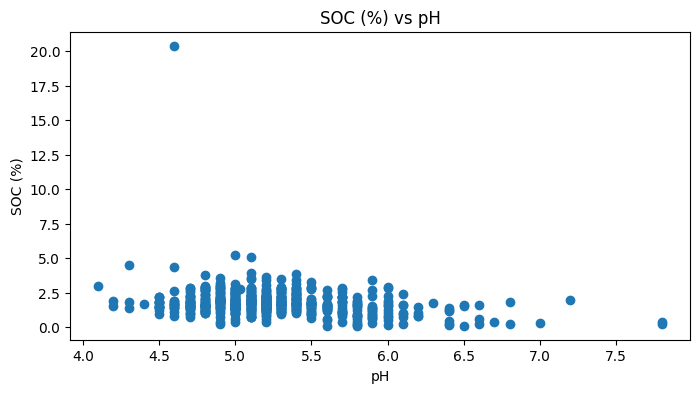

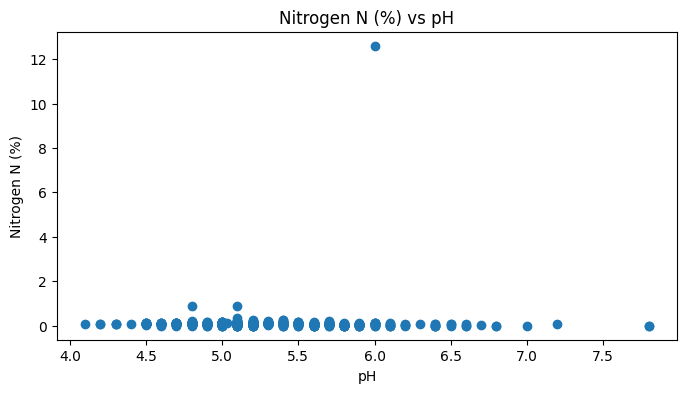

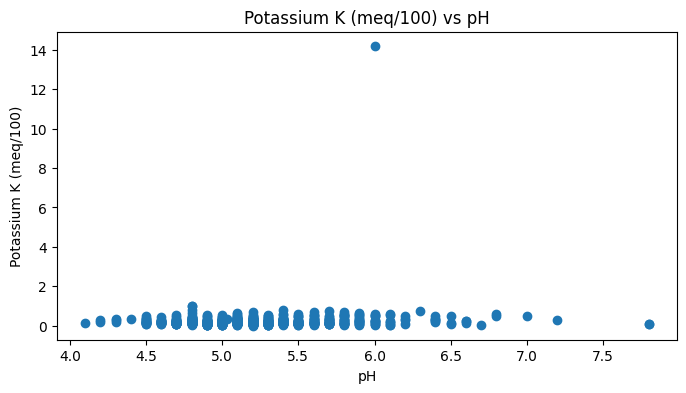

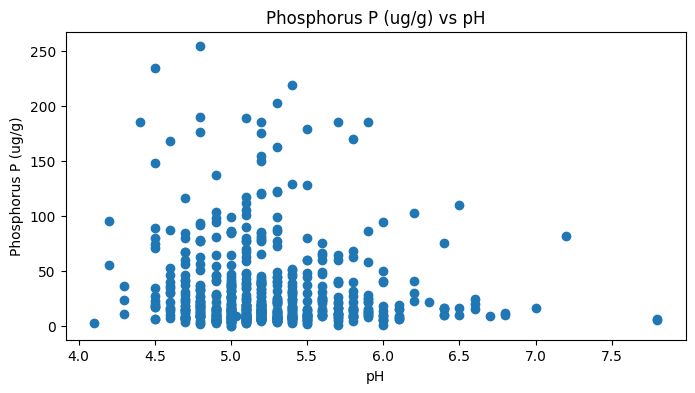

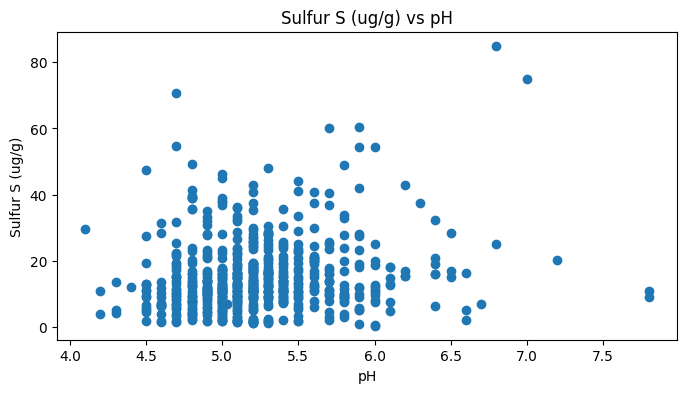

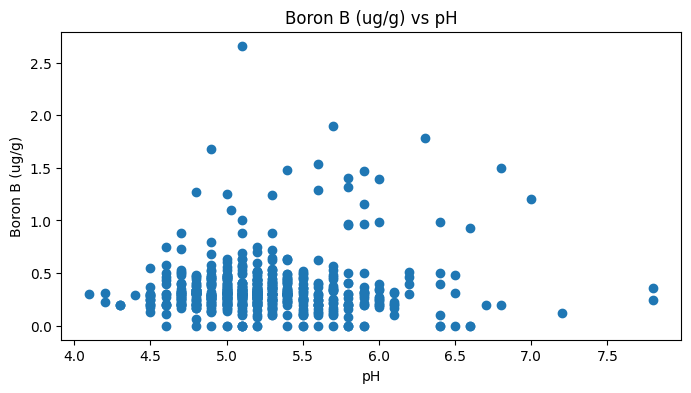

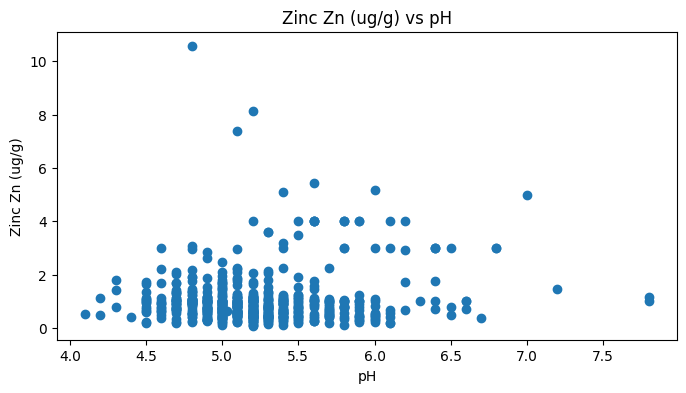

In [ ]:
cols = ["SOC (%)",	"Nitrogen N (%)",	"Potassium K (meq/100)",	"Phosphorus P (ug/g)",	"Sulfur S (ug/g)",	"Boron B (ug/g)",	"Zinc Zn (ug/g)"]

for col in cols:
  plt.figure(figsize=(8,4))
  plt.scatter(data['pH'], data[col])
  plt.xlabel('pH')
  plt.ylabel(col)
  plt.title(f'{col} vs pH')
  plt.show()


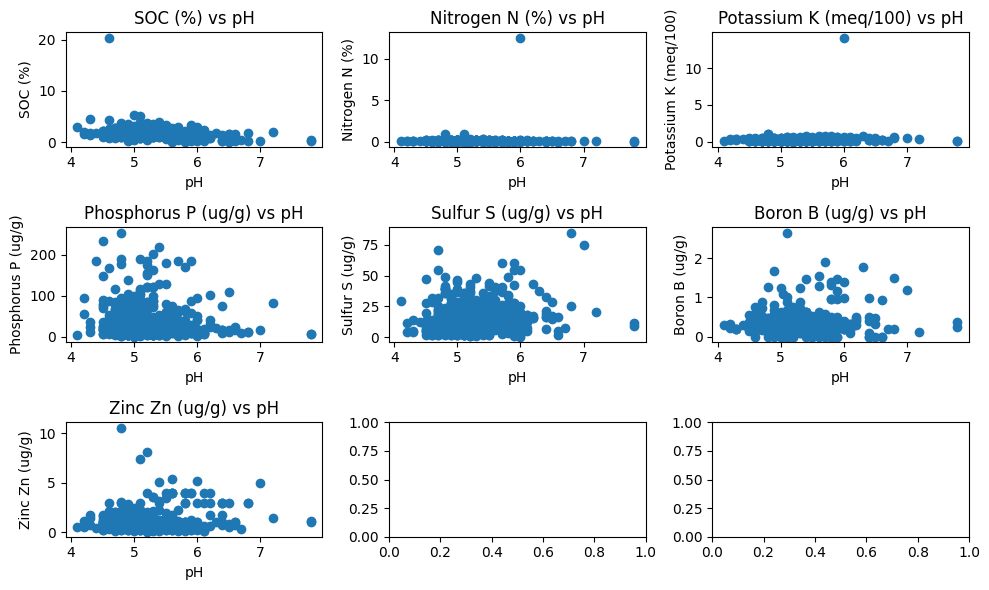

In [ ]:
import matplotlib.pyplot as plt

# Define columns and set up a 3x2 grid for subplots
cols = ["SOC (%)", "Nitrogen N (%)", "Potassium K (meq/100)", "Phosphorus P (ug/g)", "Sulfur S (ug/g)", "Boron B (ug/g)", "Zinc Zn (ug/g)"]
fig, axes = plt.subplots(3, 3, figsize=(10, 6))  # 3 rows, 2 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a scatter plot
for i, col in enumerate(cols):
    axes[i].scatter(data['pH'], data[col])
    axes[i].set_xlabel('pH')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col} vs pH')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
# Group by 'Data Collection Year' and calculate the mean for each nutrient
yearly_averages = data.groupby('Data Collection Year')[['pH', 'SOC (%)', 'Nitrogen N (%)',
                                                     'Potassium K (meq/100)', 'Phosphorus P (ug/g)',
                                                     'Sulfur S (ug/g)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']].mean()

print("Yearly Averages of Soil Nutrients:")
print(yearly_averages)


Yearly Averages of Soil Nutrients:
                            pH   SOC (%)  Nitrogen N (%)  \
Data Collection Year                                       
1990                  5.640000  0.974833        0.002005   
1997                  5.282474  1.654021        0.104021   
2005                  5.130387  1.951044        0.137298   
2016                  5.337677  1.842222        0.092929   

                      Potassium K (meq/100)  Phosphorus P (ug/g)  \
Data Collection Year                                               
1990                               0.437667            41.616667   
1997                               0.176289            38.590309   
2005                               0.225414            24.719669   
2016                               0.243737            40.993636   

                      Sulfur S (ug/g)  Boron B (ug/g)  Zinc Zn (ug/g)  
Data Collection Year                                                   
1990                        20.300000        0.2200

In [ ]:
yearly_averages.head(5)

,pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
Data Collection Year,,,,,,,,
1990,5.640000,0.974833,0.002005,0.437667,41.616667,20.300000,0.220000,2.083333
1997,5.282474,1.654021,0.104021,0.176289,38.590309,14.134021,0.351237,0.521856
2005,5.130387,1.951044,0.137298,0.225414,24.719669,15.479613,0.325414,0.876409
2016,5.337677,1.842222,0.092929,0.243737,40.993636,13.009273,0.511212,1.508485


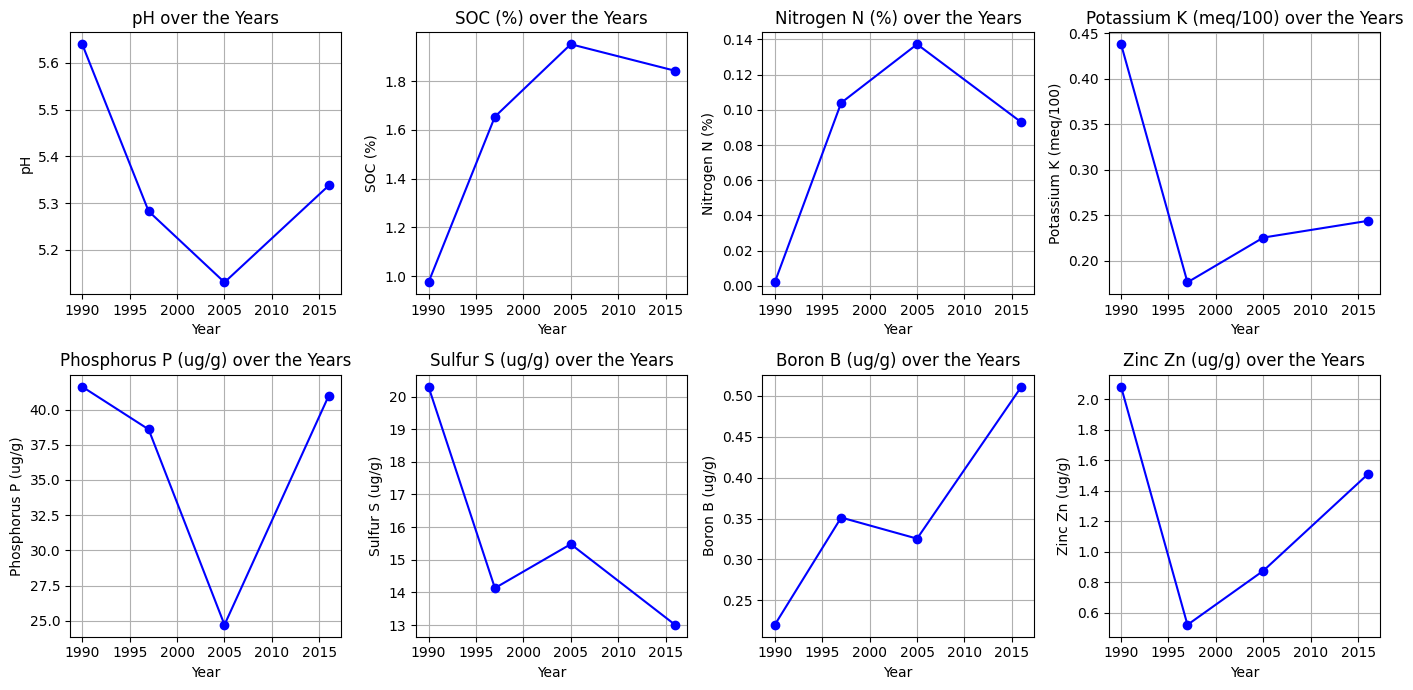

In [ ]:
# Set up the 4x2 grid for subplots (4 rows and 2 columns)
fig, axes = plt.subplots(2, 4, figsize=(14, 7))  # Adjust the size as necessary
axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

# List of column names for each nutrient
nutrients = ['pH', 'SOC (%)', 'Nitrogen N (%)', 'Potassium K (meq/100)',
             'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']

# Loop through each nutrient and plot the line chart
for i, nutrient in enumerate(nutrients):
    axes[i].plot(yearly_averages.index, yearly_averages[nutrient], marker='o', color='b')
    axes[i].set_title(f'{nutrient} over the Years')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(nutrient)
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the model
model = LinearRegression()

# List of columns to analyze
nutrient_columns = ['pH', 'SOC (%)', 'Nitrogen N (%)', 'Potassium K (meq/100)',
                    'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']

# Iterate through each nutrient column and perform linear regression
for nutrient in nutrient_columns:
    # Extract data for the current nutrient
    years = data['Data Collection Year'].values.reshape(-1, 1)  # Predictor variable
    nutrient_values = data[nutrient].values  # Response variable

    # Fit the model
    model.fit(years, nutrient_values)

    # Calculate R-squared value
    r_squared = model.score(years, nutrient_values)

    # Print the result for the current nutrient
    print(f"R-squared value for {nutrient}: {r_squared}")

    # Evaluate the trend
    if r_squared > 0.7:
        print(f"There is a strong trend in {nutrient} levels over the years.")
    else:
        print(f"No significant trend detected in {nutrient} levels.")
    print('-' * 50)  # Separator for readability


R-squared value for pH: 0.0196059804098202
No significant trend detected in pH levels.
--------------------------------------------------
R-squared value for SOC (%): 0.03919963577062846
No significant trend detected in SOC (%) levels.
--------------------------------------------------
R-squared value for Nitrogen N (%): 0.0014386511230025656
No significant trend detected in Nitrogen N (%) levels.
--------------------------------------------------
R-squared value for Potassium K (meq/100): 0.0023529077576377455
No significant trend detected in Potassium K (meq/100) levels.
--------------------------------------------------
R-squared value for Phosphorus P (ug/g): 0.0007198144466378231
No significant trend detected in Phosphorus P (ug/g) levels.
--------------------------------------------------
R-squared value for Sulfur S (ug/g): 0.015655347066984793
No significant trend detected in Sulfur S (ug/g) levels.
--------------------------------------------------
R-squared value for Boron B 

### 1. **Split by Time (Most Common Approach)**
Method: Split data based on time, where we use the earlier years for training and the most recent years for testing.
<br>How:
<br>For example, we could use the first 8 years for training and the last 2 years for testing.
<br>Alternatively, we can use the first 80% of the data (e.g., the first 8 years) for training and the last 20% (the last 2 years) for testing.
<br>Why this works: This approach ensures that your model learns from past data and predicts on future data, which mimics real-world scenarios where you have past data and want to predict future outcomes.

### 2. **Year-wise Split (To Ensure Representation from Each Year)**
Method: Split the data year by year, taking 20% of data from each year.
<br>How:
<br>For each year, randomly select 20% of the data to be part of the test set while keeping the other 80% for training.
Ensure that both the training and test sets are representative of each year's data.
<br>Why this works: This ensures that each year is represented in both the training and test sets, but it still allows for temporal dependencies to be captured in the model.

### 3. **Split Without Considering the Year (Not Recommended for Time Series)**
Method: Randomly shuffle the data and split it into 80% training and 20% testing.
<br>How: Shuffle the entire dataset, mix data points from all years, and then perform the split.
<br>Why not recommended: For time series data, this can cause issues because it ignores the temporal dependencies between data points. This might lead to "future" data appearing in the training set, which is unrealistic for time-based forecasting or modeling.

### **Recommendation:**
For your soil nutrient data, Option 1 (Split by Time) is generally the best approach, where we split the data into training on past years and testing on recent years. This will simulate a real-world prediction scenario where you use past data to forecast future values.